In [1]:
import tensorflow as tf
import os 
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-02-08 23:33:48.842721: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 23:33:48.842761: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
os.listdir()

['train',
 'Untitled.ipynb',
 'googleNet.py',
 'Transfer_Learning.ipynb',
 '.ipynb_checkpoints',
 'sample',
 'test']

In [3]:
TRAIN_DIR = "./train"

In [4]:
TEST_DIR = "./test"

In [5]:
os.listdir(TRAIN_DIR)

['street', 'mountain', 'sea', 'forest', 'glacier', 'buildings']

In [6]:
os.listdir(TEST_DIR)

['street', 'mountain', 'sea', 'forest', 'glacier', 'buildings']

In [7]:
train_aug = ImageDataGenerator(rescale = 1/255.0,
                               rotation_range=45,
                               zoom_range=0.2,
                               horizontal_flip = True 
)

In [8]:
test_aug = ImageDataGenerator(rescale = 1/255.0)

In [9]:
training_data = train_aug.flow_from_directory(TRAIN_DIR,
                                   batch_size=32,
                                   target_size=(224,224),
                                   shuffle=True,
                                   class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [10]:
testing_data = test_aug.flow_from_directory(TEST_DIR,
                                   batch_size=32,
                                   target_size=(224,224),
                                   shuffle=True,
                                   class_mode='categorical')

Found 3000 images belonging to 6 classes.


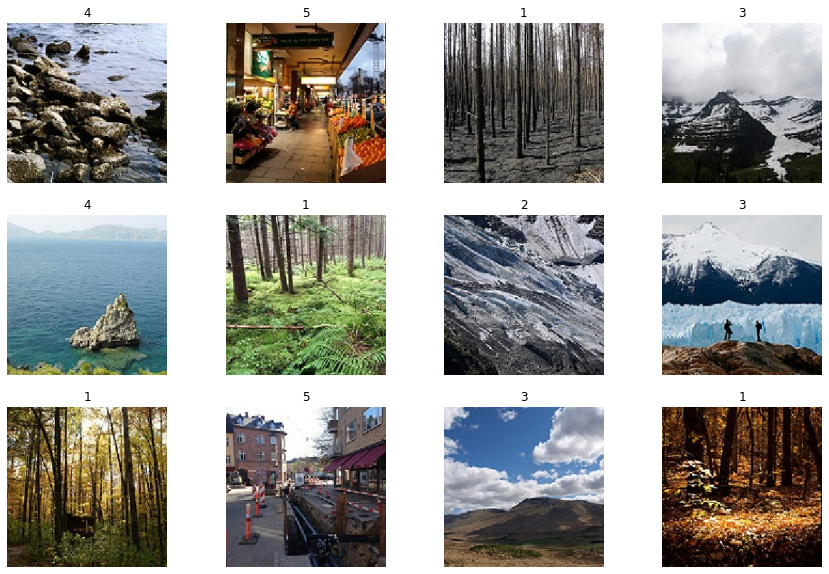

In [11]:
plt.figure(figsize=(15,10))
n = 12
for i in range(n):
    plt.subplot(3,4,i+1)
    validImages,validLabels = testing_data[i+(i*3)]
    plt.imshow(validImages[0])
    decodeLabel = np.argmax(validLabels)
    plt.title(decodeLabel)
    plt.axis("off")

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,3,input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64,3,activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(6,activation="softmax"))

In [19]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])

In [20]:
history = model.fit(training_data,validation_data=testing_data,epochs=3,steps_per_epoch=100)

Epoch 1/3
100/100 [==============================] - 269s 3s/step - loss: 4.5145 - acc: 0.4381 - val_loss: 1.6363 - val_acc: 0.4303
Epoch 2/3
100/100 [==============================] - 192s 2s/step - loss: 1.2219 - acc: 0.5556 - val_loss: 1.6038 - val_acc: 0.3743
Epoch 3/3
100/100 [==============================] - 161s 2s/step - loss: 1.1339 - acc: 0.5678 - val_loss: 1.4408 - val_acc: 0.3850


In [26]:
model.save("testing_model.h5")

In [ ]:
plt.subplot(2,1,1)
plt.plot(history['epochs'],history['train_loss'],label="train_loss")
plt.plot(history['epochs'],history['train_loss'],label="train_loss")
plt.subplot(2,1,2)

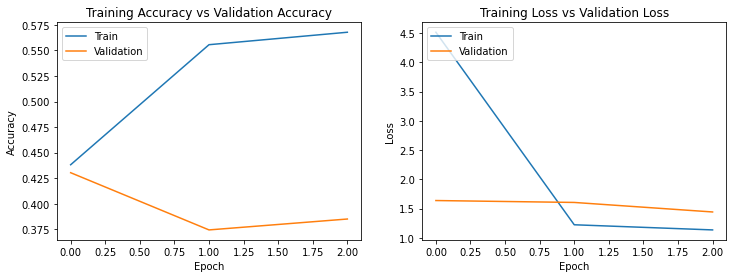

In [27]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

In [28]:
from tensorflow.keras.applications import vgg16

In [29]:
vgg_model = vgg16.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3))

In [30]:
model = keras.models.Sequential()
model.add(vgg_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(6,activation="softmax"))

In [32]:
model.compile(loss='categorical_crossentropy',
                 optimizer=keras.optimizers.RMSprop(lr=1e-5),
                 metrics=['acc'])

In [ ]:
history = model.fit(training_data,epochs=3,validation_data=testing_data,steps_per_epoch=10)

Epoch 1/3


2023-02-09 01:06:24.326162: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-02-09 01:06:24.808457: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-02-09 01:07:05.083420: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-02-09 01:07:06.220609: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


 2/10 [=====>........................] - ETA: 3:33 - loss: 1.8843 - acc: 0.1600

2023-02-09 01:07:39.441236: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


10/10 [==============================] - ETA: 0s - loss: 1.6212 - acc: 0.3725 

In [29]:
model.save("Intel_model_save.h5")

In [28]:
model.save_weights("Intel_weights_save.h5")